If you do not have `sentence_transformers` you can install it with pip

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

We will be using a toy dataset of hashtags on TikTok. You job is to cluster them into three separate clusters

In [1]:
tags = [
    # Climate Change
    "Climate change", "Global warming", "Carbon emissions", "Renewable energy",
    "Rising sea levels", "Carbon footprints", "Forests", "Melting icebergs",
    "Sustainable living",

    # Technology
    "Quantum computing", "iPhone", "Self-driving cars",
    "Cybersecurity", "Virtual reality", "Big data", "Cloud computing",
    "Blockchain", "5G networks",

    # Fitness
    "Running", "Protein intake", "Muscle Recovery",
    "Weightlifting", "Yoga", "Hydration",
    "Fitness", "Recovery time"
]

# TODOs:
Convert tags into word embeddings using pretrained language models
https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

In [8]:
from sentence_transformers import SentenceTransformer

# Load https://huggingface.co/sentence-transformers/all-mpnet-base-v2
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(tags)
similarities = model.similarity(embeddings, embeddings)

Apply K-Means clustering on the embeddings

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(similarities)
kmeans.labels_
clusters = kmeans.fit_predict(embeddings)

c:\Users\Zhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Zhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualization

Reduce dimensionality with PCA for visualization

In [17]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

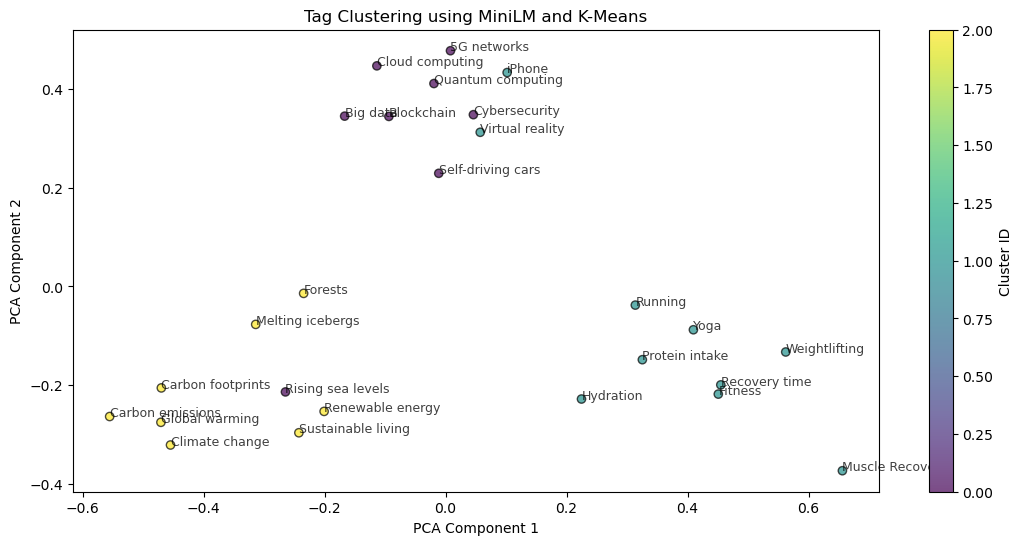

In [18]:
# Visualize the clusters
plt.figure(figsize=(13, 6))
scatter = plt.scatter(
    reduced_embeddings[:, 0], reduced_embeddings[:, 1],
    c=clusters, cmap="viridis", alpha=0.7, edgecolors="k"
)

# Annotate points with the tag
for i, phrase in enumerate(tags):
    plt.annotate(phrase, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, alpha=0.75)

plt.colorbar(scatter, label="Cluster ID")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Tag Clustering using MiniLM and K-Means")
plt.show()